In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

In [35]:
# vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_10_10_100.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_10_10_100.pkl","rb"))

In [36]:
# vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_10_10_10.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_10_10_10.pkl","rb"))

In [37]:
vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_subsample_10_10_10.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_subsample_10_10_10.pkl","rb"))

In [38]:
vg_noun_data["y_mat"].shape

(10, 10, 10)

In [39]:
vg_noun_data_ymat=np.mean(vg_noun_data["y_mat"],axis=-1)
vg_verb_data_ymat=np.mean(vg_verb_data["y_mat"],axis=-1)

In [40]:
# vg_noun_data_ymat=vg_noun_data["y_mat"][:,:,-1]

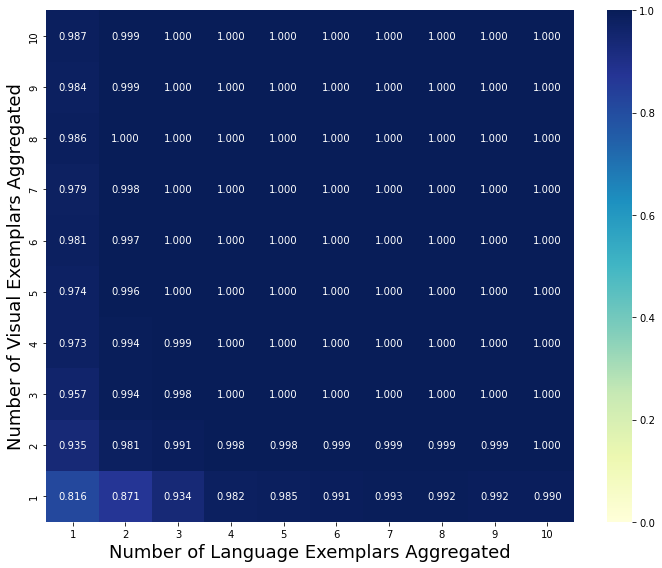

In [41]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(vg_noun_data_ymat,vmin=0,vmax=1,annot=True,fmt=".3f",cmap="YlGnBu",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_noun_bert_heatmap.png")
plt.show()

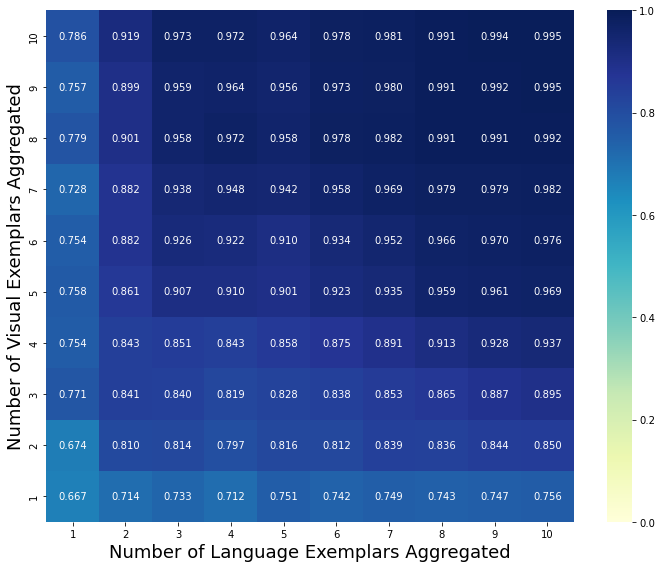

In [42]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(vg_verb_data_ymat,vmin=0,vmax=1,annot=True,fmt=".3f",cmap="YlGnBu",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_verb_bert_heatmap.png")
plt.show()

In [43]:
def compute_gradient_diff(ymat):
    diff=np.zeros((len(ymat)-1,len(ymat[0])-1))
    for i in range(len(ymat)-1):
        for j in range(len(ymat[0])-1):
            f_diff_x=ymat[i+1][j]-ymat[i][j]
            f_diff_y=ymat[i][j+1]-ymat[i][j]
            diff_x_minus_y=f_diff_x-f_diff_y
            # print(diff_x_minus_y)
            diff[i][j]=diff_x_minus_y
    return diff

In [44]:
diff_noun=compute_gradient_diff(vg_noun_data_ymat)
diff_verb=compute_gradient_diff(vg_verb_data_ymat)

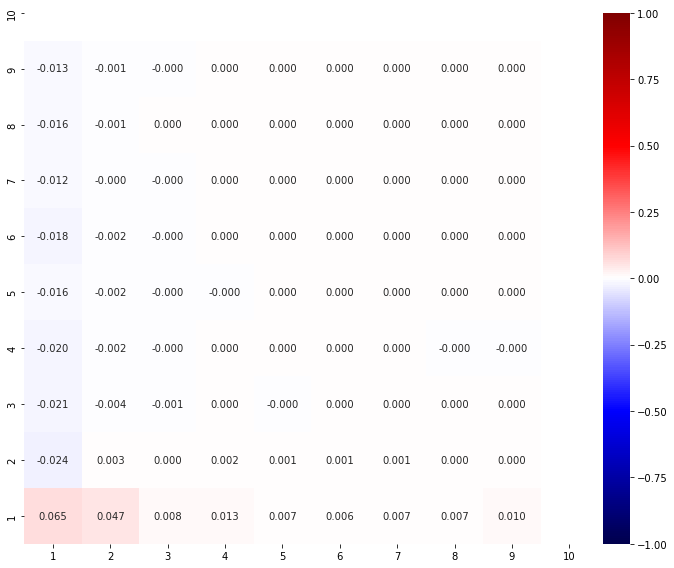

In [45]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(diff_noun,vmin=-1,vmax=1,annot=True,fmt=".3f",cmap="seismic",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
# plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
# plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_noun_bert_heatmap_diff.png")
plt.show()

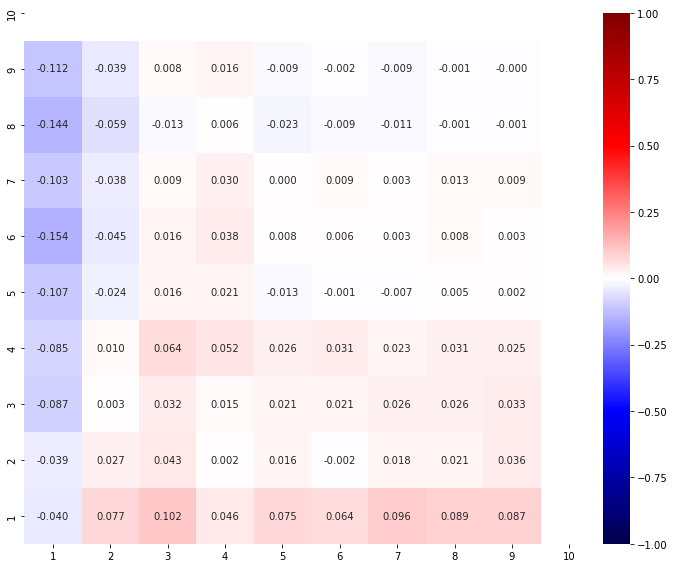

In [46]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(diff_verb,vmin=-1,vmax=1,annot=True,fmt=".3f",cmap="seismic",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
# plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
# plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_verb_bert_heatmap_diff.png")
plt.show()